In [1]:
#S09 T01: Practicant amb training i test sets

In [74]:
#Nivell 1

In [75]:
#Llibreries
import pandas as pd
import statistics
from statistics import mean, harmonic_mean, median, mode, stdev
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#Exercici 1
#Parteix el conjunt de dadesDelayedFlights.csv en train i test. 
#Estudia els dos conjunts per separat, a nivell descriptiu.

#Carreguem dataframe del fitxer de dades DelayedFlights
flights_df = pd.read_csv('Python/DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [77]:
#Train / Test
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
#-->Train Dataset: S'utilitza per adaptar-se al model Machine learning.
#-->Test Dataset: Aval.lua el model fit Machine learning.

#Els atributs CancellationCode i Diverted no són rellevants en aquest exercici. Els esborrem.
flights_df.drop(columns=['CancellationCode'], inplace=True)
flights_df.drop(columns=['Diverted'], inplace=True)

#Separem les dades de flights_df en Train Set i Test Set
train, test = train_test_split(flights_df)

In [78]:
#El Train Set generat disposa de 1.452.568 instàncies.
print('Train Set: \n ', train)

Train Set: 
           Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1802617     6641957  2008     12          22          1   1531.0        1442   
700497      2290923  2008      4           8          2   1150.0        1055   
1936220     7007747  2008     12          12          5   1404.0        1345   
565292      1764352  2008      3          30          7   1859.0        1820   
170838       555654  2008      1          18          5   1259.0        1225   
...             ...   ...    ...         ...        ...      ...         ...   
432241      1336635  2008      3          16          7   1412.0        1351   
166345       539398  2008      1          15          2   1523.0        1516   
1312866     4400009  2008      8          24          7   2104.0        2055   
348818      1094952  2008      2          22          5   1342.0        1305   
1650313     6047135  2008     11           8          6   1313.0        1245   

         ArrTime  CRSArrT

In [79]:
#El Test Set generat disposa de 484.190 instàncies.
print('Test Set: \n ', test)

Test Set: 
           Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1620369     5908314  2008     10          22          3   1806.0        1700   
979069      3279700  2008      6          20          5   1845.0        1835   
630815      2013847  2008      4           3          4   1345.0        1330   
1932580     6994459  2008     12           1          1    736.0         730   
705387      2306887  2008      4          29          2   1121.0         925   
...             ...   ...    ...         ...        ...      ...         ...   
1384821     4706486  2008      8          22          5    738.0         730   
694613      2271361  2008      4          28          1   1819.0        1810   
1603789     5825208  2008     10          23          4    827.0         815   
235994       751444  2008      2           7          4    905.0         725   
1461176     5016896  2008      9          16          2   1638.0        1627   

         ArrTime  CRSArrTi

In [80]:
#Nivell 2

In [81]:
#Llibreries
from sklearn.preprocessing import StandardScaler

In [82]:
#Exercici 2
#Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, 
#polinomis...).

In [83]:
#1.Transformació del Train Set - Estandardització de dades númeriques

In [84]:
#Llibreries
from sklearn.preprocessing import StandardScaler

In [85]:
#Visualitzem les dades numèriques del dataset 'TRAIN SET' relacionats amb el Delay
train_del=train[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].dropna()
train_del

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1802617,41.0,0.0,0.0,0.0,0.0
700497,0.0,0.0,0.0,0.0,53.0
565292,1.0,0.0,0.0,0.0,35.0
170838,14.0,0.0,0.0,0.0,9.0
840567,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1466079,72.0,0.0,1.0,0.0,0.0
1546558,11.0,0.0,0.0,0.0,35.0
432241,16.0,0.0,0.0,0.0,0.0
348818,0.0,0.0,1.0,0.0,25.0


In [86]:
scaler = StandardScaler() #
scaler.fit(train_del) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(train_del))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[ 0.50168157 -0.17222648 -0.44400913 -0.04493167 -0.6014007 ]
 [-0.44091666 -0.17222648 -0.44400913 -0.04493167  0.65767179]
 [-0.41792646 -0.17222648 -0.44400913 -0.04493167  0.23006226]
 ...
 [-0.07307345 -0.17222648 -0.44400913 -0.04493167 -0.6014007 ]
 [-0.44091666 -0.17222648 -0.41449852 -0.04493167 -0.00749858]
 [-0.30297546 -0.17222648 -0.44400913 -0.04493167 -0.15003509]]


In [87]:
# Nombre d'instàncies als atributs relacionats amb Delay.
train_del.count() # 935252 instàncies.

CarrierDelay         935758
WeatherDelay         935758
NASDelay             935758
SecurityDelay        935758
LateAircraftDelay    935758
dtype: int64

In [88]:
# Mitjana aritmetica als atributs relacionats amb Delay.
train_del.mean()

CarrierDelay         19.178461
WeatherDelay          3.708845
NASDelay             15.045748
SecurityDelay         0.091093
LateAircraftDelay    25.315649
dtype: float64

In [89]:
# Mitjana als atributs relacionats amb Delay.
train_del.median() # Els valors es situen entre 0, 2 i 8

CarrierDelay         2.0
WeatherDelay         0.0
NASDelay             2.0
SecurityDelay        0.0
LateAircraftDelay    8.0
dtype: float64

In [90]:
# Mitjana baixa als atributs relacionats amb Delay.
statistics.median_low(train_del)

'NASDelay'

In [91]:
# Mitjana alta als atributs relacionats amb Delay.
statistics.median_high(train_del)

'NASDelay'

In [92]:
# Les mitjanes alta i baixa coincideixen: 'NASDelay'

In [93]:
# Moda als atributs relacionats amb Delay.
train_del.mode() #L'endarreriment de les companyies aèries no és la norma. 

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Desviació standard als atributs relacionats amb Delay.
train_del.std()

CarrierDelay         43.496816
WeatherDelay         21.534706
NASDelay             33.886141
SecurityDelay         2.027369
LateAircraftDelay    42.094501
dtype: float64

In [95]:
# Valors minims als atributs relacionats amb Delay.
train_del.min() #Valor minim a tots els atributs: 0.

CarrierDelay         0.0
WeatherDelay         0.0
NASDelay             0.0
SecurityDelay        0.0
LateAircraftDelay    0.0
dtype: float64

In [96]:
# Valors maxims als atributs relacionats amb Delay.
train_del.max() 

CarrierDelay         1951.0
WeatherDelay         1352.0
NASDelay             1357.0
SecurityDelay         357.0
LateAircraftDelay    1316.0
dtype: float64

In [97]:
#Calculem l'endarreriment en valors totals de les aerolinies i ho posem en un nou atribut (AllDelay).
train_del['AllDelay'] = train_del.apply(lambda row: row.CarrierDelay + row.WeatherDelay + row.NASDelay + row.SecurityDelay + row.LateAircraftDelay, axis = 1) 

In [98]:
train_del['AllDelay'].sort_values(ascending=False).head(n=10)# Els 10 vols amb més endarreriment.

322516     2461.0
839306     1951.0
1009553    1707.0
1881639    1655.0
163379     1525.0
1214839    1510.0
521096     1490.0
1875741    1417.0
1885481    1395.0
685763     1395.0
Name: AllDelay, dtype: float64

In [99]:
train_del['AllDelay'].sort_values(ascending=False).tail(n=10)# Els 10 vols amb menys endarreriment.

1345235    15.0
1489783    15.0
1475063    15.0
1435384    15.0
1273884    15.0
635192     15.0
1151451    15.0
1577981    15.0
131238     15.0
1635021    15.0
Name: AllDelay, dtype: float64

In [100]:
#Visualitzem mes dades numèriques del dataset 'TRAIN SET' relacionats amb Time
train_tim=train[['DepTime','CRSDepTime','ArrTime','CRSArrTime']]
train_tim=train_tim.dropna() #Esborrem valors NaN
scaler = StandardScaler() #
scaler.fit(train_tim) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(train_tim))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[ 0.02700549 -0.06122439  0.21242043  0.02502097]
 [-0.81883315 -0.97252227 -0.65259785 -0.93502142]
 [-0.25494073 -0.28963756 -0.09964313 -0.19023517]
 ...
 [ 1.29909351  1.38225261  1.10298777  1.21969256]
 [-0.39258376 -0.38382855 -0.00839647 -0.20315054]
 [-0.45696518 -0.52511504 -0.33870936 -0.50450914]]


In [101]:
# Nombre d'instàncies als atributs relacionats amb Time.
train_tim.count() # 1447165 instàncies.

DepTime       1447246
CRSDepTime    1447246
ArrTime       1447246
CRSArrTime    1447246
dtype: int64

In [102]:
# Mitjana aritmetica als atributs relacionats amb Time.
train_tim.mean()

DepTime       1518.835635
CRSDepTime    1468.000104
ArrTime       1610.600977
CRSArrTime    1634.376188
dtype: float64

In [103]:
# Mitjana als atributs relacionats amb Time.
train_tim.median() 

DepTime       1545.0
CRSDepTime    1510.0
ArrTime       1715.0
CRSArrTime    1705.0
dtype: float64

In [104]:
# Mitjana baixa als atributs relacionats amb Time.
statistics.median_low(train_tim)

'CRSArrTime'

In [105]:
# Mitjana alta als atributs relacionats amb Time.
statistics.median_high(train_tim)

'CRSDepTime'

In [106]:
# Moda als atributs relacionats amb Time.
train_tim.mode()  

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,1800.0,1800,2100.0,1930


In [107]:
# Desviació standard als atributs relacionats amb Time.
train_tim.std()

DepTime       450.440682
CRSDepTime    424.669192
ArrTime       547.965490
CRSArrTime    464.562979
dtype: float64

In [108]:
# Valors minims als atributs relacionats amb Time.
train_tim.min() #Valor minim als atributs: entre 0 i 1.

DepTime       1.0
CRSDepTime    0.0
ArrTime       1.0
CRSArrTime    0.0
dtype: float64

In [109]:
# Valors maxims als atributs relacionats amb Time.
train_tim.max() 

DepTime       2400.0
CRSDepTime    2359.0
ArrTime       2400.0
CRSArrTime    2359.0
dtype: float64

In [112]:
#Calculem l'endarrerriment en valors totals de les aerolinies i ho posem en un nou atribut (AllDelay).
train_del['AllDelay'] = train_del.apply(lambda row: row.CarrierDelay + row.WeatherDelay + row.NASDelay + row.SecurityDelay + row.LateAircraftDelay, axis = 1) 
train_del['AllDelay'].sort_values(ascending=False) 

322516     2461.0
839306     1951.0
1009553    1707.0
1881639    1655.0
163379     1525.0
            ...  
635192       15.0
1151451      15.0
1577981      15.0
131238       15.0
1635021      15.0
Name: AllDelay, Length: 935758, dtype: float64

In [113]:
#Visualitzem les dades numèriques del dataset 'TRAIN SET' relacionats amb Taxi
train_tax = train[['TaxiIn','TaxiOut']]
train_tax = train_tax.dropna() #Esborrem valors NaN
scaler = StandardScaler() #
scaler.fit(train_tax) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(train_tax))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[-0.15505072 -0.43396616]
 [-0.72322138 -0.15487947]
 [ 0.79190037 -0.36419449]
 ...
 [-0.34444094  0.05443556]
 [ 0.41311993 -0.15487947]
 [-0.53383116 -0.22465114]]


In [114]:
# Nombre d'instàncies als atributs relacionats amb Taxi.
train_tax.count() # 1447252 instàncies.

TaxiIn     1447246
TaxiOut    1447246
dtype: int64

In [115]:
# Mitjana aritmetica als atributs relacionats amb Taxi.
train_tax.mean()

TaxiIn      6.818684
TaxiOut    18.219804
dtype: float64

In [116]:
# Mitjana als atributs relacionats amb Taxi.
train_tax.median() 

TaxiIn      6.0
TaxiOut    14.0
dtype: float64

In [117]:
# Mitjana baixa als atributs relacionats amb Taxi.
statistics.median_low(train_tax)

'TaxiIn'

In [118]:
# Mitjana alta als atributs relacionats amb Taxi.
statistics.median_high(train_tax)

'TaxiOut'

In [119]:
# Moda als atributs relacionats amb Taxi.
train_tax.mode()  

,TaxiIn,TaxiOut
0,4.0,11.0


In [120]:
# Desviació standard als atributs relacionats amb Taxi.
train_tax.std()

TaxiIn      5.280106
TaxiOut    14.332469
dtype: float64

In [121]:
# Valors minims als atributs relacionats amb Taxi.
train_tax.min() #Valor minim als atributs: 0.

TaxiIn     0.0
TaxiOut    0.0
dtype: float64

In [122]:
# Valors maxims als atributs relacionats amb Taxi.
train_tax.max() 

TaxiIn     225.0
TaxiOut    422.0
dtype: float64

In [123]:
#1.Transformació del Train Set - Columnes dummies

In [124]:
# Atributs categòrics en dummy: 'UniqueCarrier'
train_uc = pd.get_dummies(train['UniqueCarrier'])
train_uc.head(n=10)

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
1802617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
700497,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1936220,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
565292,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170838,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
840567,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
153639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
937358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
220863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1880209,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [125]:
# Atributs categòrics en dummy: 'TailNum'
train_tn = pd.get_dummies(train['TailNum'])
train_tn.head(n=10)

MemoryError: Unable to allocate 7.26 GiB for an array with shape (1452568, 5364) and data type uint8

In [126]:
# Atributs categòrics en dummy: 'Origin'
train_ori = pd.get_dummies(train['Origin'])
train_ori.head(n=10)

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
1802617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1936220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Atributs categòrics en dummy: 'Dest'
train_des = pd.get_dummies(train['Dest'])
train_des.head(n=10)

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
1802617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1936220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
#2.Transformació del Test Set - Estandardització de dades númeriques

In [129]:
test_del=train[['ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay']].dropna()
test_del

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay
1802617,116.0,124.0,98.0,41.0,49.0
700497,63.0,65.0,44.0,53.0,55.0
1936220,112.0,121.0,88.0,10.0,19.0
565292,174.0,177.0,147.0,36.0,39.0
170838,109.0,120.0,90.0,23.0,34.0
...,...,...,...,...,...
432241,72.0,77.0,56.0,16.0,21.0
166345,57.0,60.0,38.0,4.0,7.0
1312866,131.0,126.0,107.0,14.0,9.0
348818,144.0,155.0,119.0,26.0,37.0


In [130]:
scaler = StandardScaler() #
scaler.fit(test_del) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(test_del))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[-0.24047805 -0.14343928 -0.14995137 -0.02173655  0.1102268 ]
 [-0.9762871  -0.97214459 -0.93702988  0.18945102  0.22281405]
 [-0.2960108  -0.18557684 -0.29570665 -0.56730442 -0.45270949]
 ...
 [-0.0322302  -0.11534758 -0.01877162 -0.49690856 -0.64035491]
 [ 0.14825127  0.29198215  0.15613471 -0.285721   -0.11494772]
 [-0.85133839 -0.83168606 -0.80585013 -0.30331996 -0.2838286 ]]


In [131]:
#Visualitzem les dades numèriques del dataset 'TEST SET' relacionats amb el Delay
test_del=train[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].dropna()
test_del

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1802617,41.0,0.0,0.0,0.0,0.0
700497,0.0,0.0,0.0,0.0,53.0
565292,1.0,0.0,0.0,0.0,35.0
170838,14.0,0.0,0.0,0.0,9.0
840567,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1466079,72.0,0.0,1.0,0.0,0.0
1546558,11.0,0.0,0.0,0.0,35.0
432241,16.0,0.0,0.0,0.0,0.0
348818,0.0,0.0,1.0,0.0,25.0


In [132]:
scaler = StandardScaler() #
scaler.fit(test_del) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(test_del))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[ 0.50168157 -0.17222648 -0.44400913 -0.04493167 -0.6014007 ]
 [-0.44091666 -0.17222648 -0.44400913 -0.04493167  0.65767179]
 [-0.41792646 -0.17222648 -0.44400913 -0.04493167  0.23006226]
 ...
 [-0.07307345 -0.17222648 -0.44400913 -0.04493167 -0.6014007 ]
 [-0.44091666 -0.17222648 -0.41449852 -0.04493167 -0.00749858]
 [-0.30297546 -0.17222648 -0.44400913 -0.04493167 -0.15003509]]


In [133]:
#Visualitzem mes dades numèriques del dataset 'TEST SET' relacionades amb Time
test_tim=train[['DepTime','CRSDepTime','ArrTime','CRSArrTime']]
test_tim=train_tim.dropna() #Esborrem valors NaN
scaler = StandardScaler() #
scaler.fit(test_tim) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(test_tim))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[ 0.02700549 -0.06122439  0.21242043  0.02502097]
 [-0.81883315 -0.97252227 -0.65259785 -0.93502142]
 [-0.25494073 -0.28963756 -0.09964313 -0.19023517]
 ...
 [ 1.29909351  1.38225261  1.10298777  1.21969256]
 [-0.39258376 -0.38382855 -0.00839647 -0.20315054]
 [-0.45696518 -0.52511504 -0.33870936 -0.50450914]]


In [134]:
#Visualitzem les dades numèriques del dataset 'TEST SET' relacionats amb Taxi
test_tax = train[['TaxiIn','TaxiOut']]
test_tax = train_tax.dropna() #Esborrem valors NaN
scaler = StandardScaler() #
scaler.fit(test_tax) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(test_tax))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[-0.15505072 -0.43396616]
 [-0.72322138 -0.15487947]
 [ 0.79190037 -0.36419449]
 ...
 [-0.34444094  0.05443556]
 [ 0.41311993 -0.15487947]
 [-0.53383116 -0.22465114]]


In [135]:
#2.Transformació del Test Set - Columnes dummies

In [136]:
# Atributs categòrics en dummy: 'UniqueCarrier'
test_uc = pd.get_dummies(test['UniqueCarrier'])
test_uc.head(n=10)

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
1620369,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
979069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
630815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1932580,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
705387,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
703188,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
666527,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1840721,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
354310,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1489492,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [137]:
# Atributs categòrics en dummy: 'TailNum'
test_tn = pd.get_dummies(test['TailNum'])
test_tn.head(n=5)

,80009E,80019E,80059E,80129E,80139E,80199E,80209E,80219E,80239E,80249E,...,N996AT,N996DL,N997AT,N997DL,N998AT,N998DL,N999CA,N999DN,NHZOAL,Unknow
1620369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1932580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# Atributs categòrics en dummy: 'Origin'
test_ori = pd.get_dummies(test['Origin'])
test_ori.head(n=10)

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
1620369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1932580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1840721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# Atributs categòrics en dummy: 'Dest'
test_des = pd.get_dummies(test['Dest'])
test_des.head(n=10)

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
1620369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1932580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1840721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
#Nivell 3

In [141]:
#Exercici 3
#Resumeix les noves columnes generades de manera estadística i gràfica

In [142]:
#Visualització dels endarreriments
max_delay=train_del['AllDelay'].sort_values(ascending=False).head(n=50)# Els 10 vols amb més endarreriment.

In [143]:
#Visualització dels endarreriments
min_delay=train_del['AllDelay'].sort_values(ascending=False).tail(n=50)# Els 50 vols amb menys endarreriment.

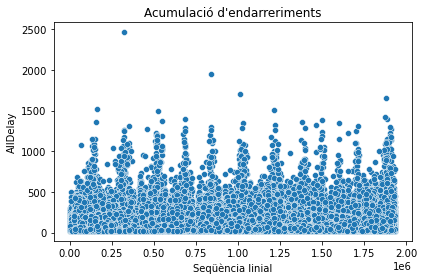

In [144]:
#Graphic: Endarreriments
plt.title("Acumulació d'endarreriments")
plt.xlabel("Seqüència linial")
sns.scatterplot(data=train_del['AllDelay'], palette ="pastel")
plt.tight_layout()
plt.show()

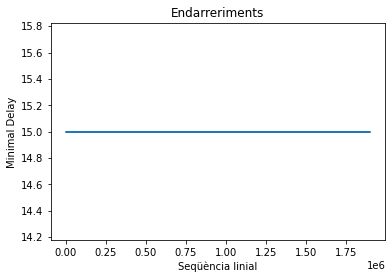

In [155]:
#Graphic: Endarreriments
# Els 150 vols amb menys endarreriment.
min_delay=train_del['AllDelay'].sort_values(ascending=False).tail(n=150)
plt.title("Endarreriments")
plt.xlabel("Seqüència linial")
plt.ylabel("Minimal Delay")
plt.plot(min_delay)
plt.show()

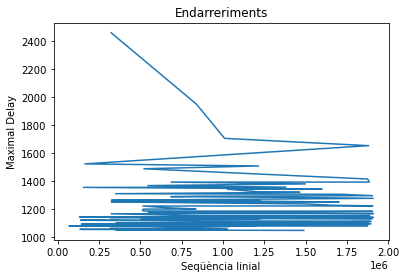

In [158]:
#Graphic: Endarreriments
# Els 100 vols amb més endarreriment.
max_delay=train_del['AllDelay'].sort_values(ascending=False).head(n=100)
plt.title("Endarreriments")
plt.xlabel("Seqüència linial")
plt.ylabel("Maximal Delay")
plt.plot(max_delay)
plt.show()